<a href="https://colab.research.google.com/github/CrocusitaG8/TelecomX/blob/main/Copia_de_TelecomX_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
# Cargar los datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

##Conocer el conjunto de datos

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# columnas con diccionarios
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [5]:
# transformar diccionarios a columnas individuales
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Unir los dataframes
df_abierto = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1), customer_df, phone_df, internet_df, account_df], axis=1)
display(df_abierto.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_abierto.to_csv('df_abierto.csv', index=False)

✅ Consultar el diccionario para comprender mejor el significado de las variables.

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

#Comprobación de incoherencias en los datos

Prestar atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías

In [7]:
# verificar tipos de datos
df_abierto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
# Buscar valores nulos
df_abierto.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
# Verificar duplicados
df_abierto.duplicated().sum()

np.int64(0)

In [10]:
# Resumen estadístico columnas numéricas (para detectar valores atípicos o anómalos)
df_abierto.describe(include=[np.number])

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [11]:
# Resumen estadístico columnas categóricas (para detectar valores atípicos o anómalos)
df_abierto.describe(include=['object'])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [12]:
# Convertir 'Charges.Total' a numérico, forzando errores a NaN
df_abierto['Charges.Total'] = pd.to_numeric(df_abierto['Charges.Total'], errors='coerce')

# Revisar cuántos valores quedaron como NaN
df_abierto['Charges.Total'].isnull().sum()

np.int64(11)

In [13]:
df_abierto[df_abierto['Charges.Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [14]:
# En Charges.Total, rellenar con 0 si tenure es 0
df_abierto.loc[
    (df_abierto['Charges.Total'].isnull()) & (df_abierto['tenure'] == 0),
    'Charges.Total'
] = 0


In [15]:
# Reemplazar "No internet service" por "No" en las columnas relacionadas
columnas_afectadas = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df_abierto[columnas_afectadas] = df_abierto[columnas_afectadas].replace("No internet service", "No")


In [16]:
# Reemplazar "No phone service" por "No" en 'MultipleLines' cuando PhoneService es "No"
df_abierto.loc[df_abierto['PhoneService'] == 'No', 'MultipleLines'] = 'No'

In [17]:
df_abierto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 



✅ Identificar las columnas más relevantes para el análisis de renuncia.

In [18]:
# Eliminar la columna 'customerID' del DataFrame
df_abierto.drop('customerID', axis=1, inplace=True)

# Confirmar que la columna fue eliminada
df_abierto.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Manejo de inconsistencias

In [19]:
# Convertir todas las columnas 'object' (texto) a minúsculas
for col in df_abierto.select_dtypes(include='object').columns:
    df_abierto[col] = df_abierto[col].str.lower()

In [20]:
# Quitar espacios innecesarios y limpiar símbolos raros
# Eliminar espacios antes o después de los valores
for col in df_abierto.select_dtypes(include='object').columns:
    df_abierto[col] = df_abierto[col].str.strip()

In [21]:
# Asegurar que las columnas numéricas sean verdaderamente numéricas
df_abierto['tenure'] = pd.to_numeric(df_abierto['tenure'], errors='coerce')
df_abierto['Charges.Monthly'] = pd.to_numeric(df_abierto['Charges.Monthly'], errors='coerce')
df_abierto['Charges.Total'] = pd.to_numeric(df_abierto['Charges.Total'], errors='coerce')

In [22]:
df_abierto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


##Columna de cuentas diarias

In [23]:
df_abierto['cuentas_diarias'] = (df_abierto['Charges.Monthly'] / 30).round(2)
df_abierto.head(100)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,cuentas_diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.19
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,2.00
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.46
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.27
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,yes,female,0,no,no,1,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,no,mailed check,70.90,70.90,2.36
96,,male,0,no,no,29,yes,no,dsl,yes,...,no,yes,no,no,one year,yes,electronic check,58.75,1696.20,1.96
97,yes,male,0,yes,no,22,yes,no,dsl,yes,...,no,yes,no,no,month-to-month,yes,electronic check,54.20,1152.70,1.81
98,,female,1,no,no,5,yes,no,dsl,yes,...,no,yes,no,no,month-to-month,no,credit card (automatic),59.90,287.85,2.00


##Estandarización y transformación de datos

#####La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos. Además, traducir o renombrar columnas y datos

In [24]:
# Reemplazar valor 0 por 'no' y 1 por 'si' en columna SeniorCitizen
df_abierto['SeniorCitizen'] = df_abierto['SeniorCitizen'].replace({0: 'no', 1: 'si'})

In [25]:
# Buscar 'yes', 'male', 'female'
for col in df_abierto.columns:
    valores_unicos = df_abierto[col].dropna().unique()
    if any(val in ['yes', 'no', 'male', 'female'] for val in valores_unicos):
        print(f'{col}: {valores_unicos}')

Churn: ['no' 'yes' '']
gender: ['female' 'male']
SeniorCitizen: ['no' 'si']
Partner: ['yes' 'no']
Dependents: ['yes' 'no']
PhoneService: ['yes' 'no']
MultipleLines: ['no' 'yes']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes']
OnlineBackup: ['yes' 'no']
DeviceProtection: ['no' 'yes']
TechSupport: ['yes' 'no']
StreamingTV: ['yes' 'no']
StreamingMovies: ['no' 'yes']
PaperlessBilling: ['yes' 'no']


In [26]:
# Reemplazar 'yes' por 'sí' en todas las columnas
df_abierto.replace(to_replace='yes', value='si', inplace=True)

In [27]:
# Reemplazar 'male' por 'hombre' y 'female' por 'mujer'
df_abierto.replace({'male': 'hombre', 'female': 'mujer'}, inplace=True)

In [28]:
# Reemplazar los valores en la columna 'Contract'
df_abierto['Contract'] = df_abierto['Contract'].replace({
    'one year': 'anual',
    'month-to-month': 'mensual',
    'two year': 'bianual'
})

In [29]:
# Reemplazar los valores de la columna 'PaymentMethod'
df_abierto['PaymentMethod'] = df_abierto['PaymentMethod'].replace({
    'mailed check': 'manual',
    'electronic check': 'manual',
    'credit card (automatic)': 'automatico',
    'bank transfer (automatic)': 'automatico'
})

In [30]:
# Reemplazar 'dsl' y 'fiber optic' por 'yes'
df_abierto['InternetService'] = df_abierto['InternetService'].replace({
    'dsl': 'yes',
    'fiber optic': 'yes'
})

In [31]:
# Mostrar valores únicos por columna de tipo object o category
for col in df_abierto.select_dtypes(include=['object', 'category']).columns:
    print(f"\n🔹 Columna: {col}")
    print(df_abierto[col].unique())


🔹 Columna: Churn
['no' 'si' '']

🔹 Columna: gender
['mujer' 'hombre']

🔹 Columna: SeniorCitizen
['no' 'si']

🔹 Columna: Partner
['si' 'no']

🔹 Columna: Dependents
['si' 'no']

🔹 Columna: PhoneService
['si' 'no']

🔹 Columna: MultipleLines
['no' 'si']

🔹 Columna: InternetService
['yes' 'no']

🔹 Columna: OnlineSecurity
['no' 'si']

🔹 Columna: OnlineBackup
['si' 'no']

🔹 Columna: DeviceProtection
['no' 'si']

🔹 Columna: TechSupport
['si' 'no']

🔹 Columna: StreamingTV
['si' 'no']

🔹 Columna: StreamingMovies
['no' 'si']

🔹 Columna: Contract
['anual' 'mensual' 'bianual']

🔹 Columna: PaperlessBilling
['si' 'no']

🔹 Columna: PaymentMethod
['manual' 'automatico']


In [32]:
# mostrar tipos de valores en columna churn
df_abierto['Churn'].value_counts()

,count
Churn,
no,5174
si,1869
,224


In [33]:
# Reemplazar strings vacíos o espacios por NaN
df_abierto['Churn'] = df_abierto['Churn'].replace(r'^\s*$', pd.NA, regex=True)

# Separar clientes con churn definido (no nulo)
df_conchurn = df_abierto[df_abierto["Churn"].notnull()].copy()

# Separar clientes con churn faltante (nulo o vacío)
df_sinchurn = df_abierto[df_abierto["Churn"].isnull()].copy()

# Verificar tamaños
print("Filas con churn definido:", df_conchurn.shape[0])
print("Filas con churn nulo:", df_sinchurn.shape[0])


Filas con churn definido: 7043
Filas con churn nulo: 224


In [34]:
# Diccionario de traducción de nombres de columnas
traducciones = {
    'Churn': 'renuncia',
    'gender': 'genero',
    'SeniorCitizen': 'senior',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antigüedad',
    'PhoneService': 'telefonia',
    'MultipleLines': 'multilinea',
    'InternetService': 'internet',
    'OnlineSecurity': 'seguridad',
    'OnlineBackup': 'respaldo',
    'DeviceProtection': 'proteccion',
    'TechSupport': 'soporte',
    'StreamingTV': 'tv',
    'StreamingMovies': 'peliculas',
    'Contract': 'contrato',
    'PaperlessBilling': 'factdigital',
    'PaymentMethod': 'pago',
    'Charges.Monthly': 'costomensual',
    'Charges.Total': 'costototal',
    'cuentas_diarias': 'costodiario'
}

# Renombrar columnas
df_conchurn.rename(columns=traducciones, inplace=True)
df_sinchurn.rename(columns=traducciones, inplace=True)

# Verificación
print(df_conchurn.columns.tolist())
print(df_sinchurn.columns.tolist())

['renuncia', 'genero', 'senior', 'pareja', 'dependientes', 'antigüedad', 'telefonia', 'multilinea', 'internet', 'seguridad', 'respaldo', 'proteccion', 'soporte', 'tv', 'peliculas', 'contrato', 'factdigital', 'pago', 'costomensual', 'costototal', 'costodiario']
['renuncia', 'genero', 'senior', 'pareja', 'dependientes', 'antigüedad', 'telefonia', 'multilinea', 'internet', 'seguridad', 'respaldo', 'proteccion', 'soporte', 'tv', 'peliculas', 'contrato', 'factdigital', 'pago', 'costomensual', 'costototal', 'costodiario']


In [35]:
df_conchurn.to_csv('df_analisis.csv', index=False)

In [36]:
df_analisis = pd.read_csv('df_analisis.csv')
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   renuncia      7043 non-null   object 
 1   genero        7043 non-null   object 
 2   senior        7043 non-null   object 
 3   pareja        7043 non-null   object 
 4   dependientes  7043 non-null   object 
 5   antigüedad    7043 non-null   int64  
 6   telefonia     7043 non-null   object 
 7   multilinea    7043 non-null   object 
 8   internet      7043 non-null   object 
 9   seguridad     7043 non-null   object 
 10  respaldo      7043 non-null   object 
 11  proteccion    7043 non-null   object 
 12  soporte       7043 non-null   object 
 13  tv            7043 non-null   object 
 14  peliculas     7043 non-null   object 
 15  contrato      7043 non-null   object 
 16  factdigital   7043 non-null   object 
 17  pago          7043 non-null   object 
 18  costomensual  7043 non-null 

In [37]:
df_sinchurn.to_csv('df_sinchurn.csv', index=False)
df_sinchurn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 30 to 7247
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   renuncia      0 non-null      object 
 1   genero        224 non-null    object 
 2   senior        224 non-null    object 
 3   pareja        224 non-null    object 
 4   dependientes  224 non-null    object 
 5   antigüedad    224 non-null    int64  
 6   telefonia     224 non-null    object 
 7   multilinea    224 non-null    object 
 8   internet      224 non-null    object 
 9   seguridad     224 non-null    object 
 10  respaldo      224 non-null    object 
 11  proteccion    224 non-null    object 
 12  soporte       224 non-null    object 
 13  tv            224 non-null    object 
 14  peliculas     224 non-null    object 
 15  contrato      224 non-null    object 
 16  factdigital   224 non-null    object 
 17  pago          224 non-null    object 
 18  costomensual  224 non-null    flo

#Análisis Descriptivo

#####Realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

### Verificar estructura de los datos

In [38]:
# Revisión general
df_analisis.info()

# Ver valores únicos por columna (útil para categóricas)
for col in df_analisis.columns:
    print(f"{col}: {df_analisis[col].nunique()} valores únicos")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   renuncia      7043 non-null   object 
 1   genero        7043 non-null   object 
 2   senior        7043 non-null   object 
 3   pareja        7043 non-null   object 
 4   dependientes  7043 non-null   object 
 5   antigüedad    7043 non-null   int64  
 6   telefonia     7043 non-null   object 
 7   multilinea    7043 non-null   object 
 8   internet      7043 non-null   object 
 9   seguridad     7043 non-null   object 
 10  respaldo      7043 non-null   object 
 11  proteccion    7043 non-null   object 
 12  soporte       7043 non-null   object 
 13  tv            7043 non-null   object 
 14  peliculas     7043 non-null   object 
 15  contrato      7043 non-null   object 
 16  factdigital   7043 non-null   object 
 17  pago          7043 non-null   object 
 18  costomensual  7043 non-null 

### Clasificar columnas

In [39]:
# Paso 1: Identificar columnas numéricas reales
colnum = ['antigüedad', 'costomensual', 'costototal', 'costodiario']

# El resto de las columnas, excepto 'renuncia', se consideran categóricas (aunque algunas tengan números como 0 y 1)
colcat = [col for col in df_analisis.columns if col not in colnum + ['renuncia']]

# Mostrar ambas listas
print("Columnas numéricas reales:", colnum)
print("Columnas categóricas:", colcat)

Columnas numéricas reales: ['antigüedad', 'costomensual', 'costototal', 'costodiario']
Columnas categóricas: ['genero', 'senior', 'pareja', 'dependientes', 'telefonia', 'multilinea', 'internet', 'seguridad', 'respaldo', 'proteccion', 'soporte', 'tv', 'peliculas', 'contrato', 'factdigital', 'pago']


##Distribución de renuncia

#### El objetivo es comprender cómo está distribuida la variable "churn" (renuncia) entre los clientes. Visualizar mediante gráficos la proporción de clientes que permanecieron y los que renunciaron.

In [40]:
# Resumen estadístico de columnas numéricas reales agrupado por renuncia
desc = df_analisis.groupby('renuncia')[colnum].describe().round(2)

# Mostrar el resumen
desc

antigüedad                                            costomensual  \
              count   mean    std  min   25%   50%   75%   max        count   
renuncia                                                                      
no           5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0       5174.0   
si           1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0       1869.0   

                 ... costototal          costodiario                          \
           mean  ...        75%      max       count  mean   std   min   25%   
renuncia         ...                                                           
no        61.27  ...    4262.85  8672.45      5174.0  2.04  1.04  0.61  0.84   
si        74.44  ...    2331.30  8684.80      1869.0  2.48  0.82  0.63  1.87   

                            
           50%   75%   max  
renuncia                    
no        2.15  2.95  3.96  
si        2.66  3.14  3.94  

[2 rows x 32 columns]

###Conteo de renuncia por variables numéricas

In [45]:
# Reiniciar diccionario de tablas
tablas_bins = {}

# Binning personalizado desde min hasta max para cada variable numérica
for col in colnum:
    min_val = df_analisis[col].min()
    max_val = df_analisis[col].max()
    bins = np.linspace(min_val, max_val, num=6)  # 5 intervalos = 6 bordes

    df_analisis[f'{col}_bin'] = pd.cut(df_analisis[col], bins=bins, include_lowest=True)

    tabla = pd.crosstab(df_analisis[f'{col}_bin'], df_analisis['renuncia'], normalize='index') * 100
    tabla = tabla.round(1)
    tabla.columns = [f'{c} (%)' for c in tabla.columns]
    tabla.reset_index(inplace=True)

    tablas_bins[col] = tabla

In [46]:
from IPython.display import display

# Mostrar todas las tablas una debajo de otra
for col in tablas_bins:
    print(f"\n🔹 Distribución de renuncia por rangos de: {col}")
    display(tablas_bins[col])



🔹 Distribución de renuncia por rangos de: antigüedad


,antigüedad_bin,no (%),si (%)
0,"(-0.001, 14.4]",53.6,46.4
1,"(14.4, 28.8]",73.8,26.2
2,"(28.8, 43.2]",78.3,21.7
3,"(43.2, 57.6]",85.0,15.0
4,"(57.6, 72.0]",92.7,7.3



🔹 Distribución de renuncia por rangos de: costomensual


,costomensual_bin,no (%),si (%)
0,"(18.249, 38.35]",88.6,11.4
1,"(38.35, 58.45]",73.0,27.0
2,"(58.45, 78.55]",70.5,29.5
3,"(78.55, 98.65]",63.0,37.0
4,"(98.65, 118.75]",69.9,30.1



🔹 Distribución de renuncia por rangos de: costototal


,costototal_bin,no (%),si (%)
0,"(-0.001, 1736.96]",67.2,32.8
1,"(1736.96, 3473.92]",75.4,24.6
2,"(3473.92, 5210.88]",83.3,16.7
3,"(5210.88, 6947.84]",85.3,14.7
4,"(6947.84, 8684.8]",89.3,10.7



🔹 Distribución de renuncia por rangos de: costodiario


,costodiario_bin,no (%),si (%)
0,"(0.609, 1.28]",88.6,11.4
1,"(1.28, 1.95]",72.9,27.1
2,"(1.95, 2.62]",70.6,29.4
3,"(2.62, 3.29]",62.8,37.2
4,"(3.29, 3.96]",70.3,29.7


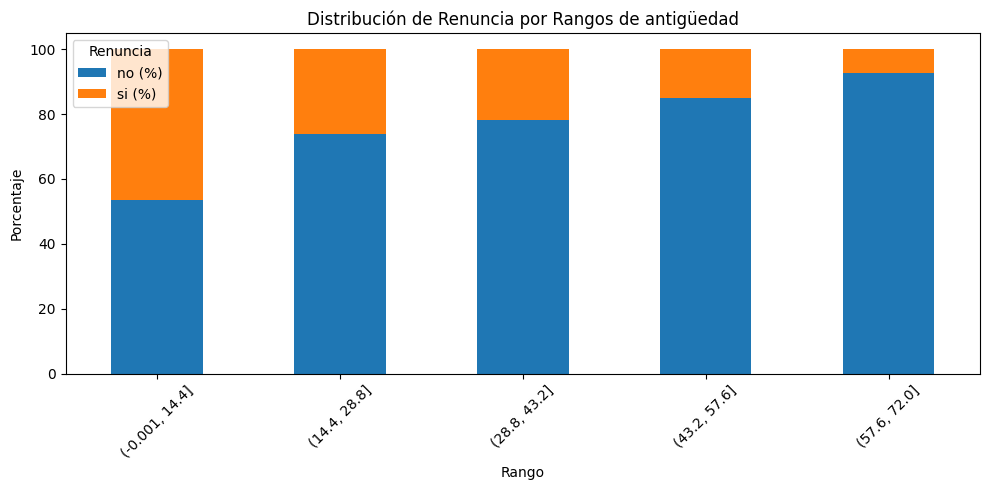

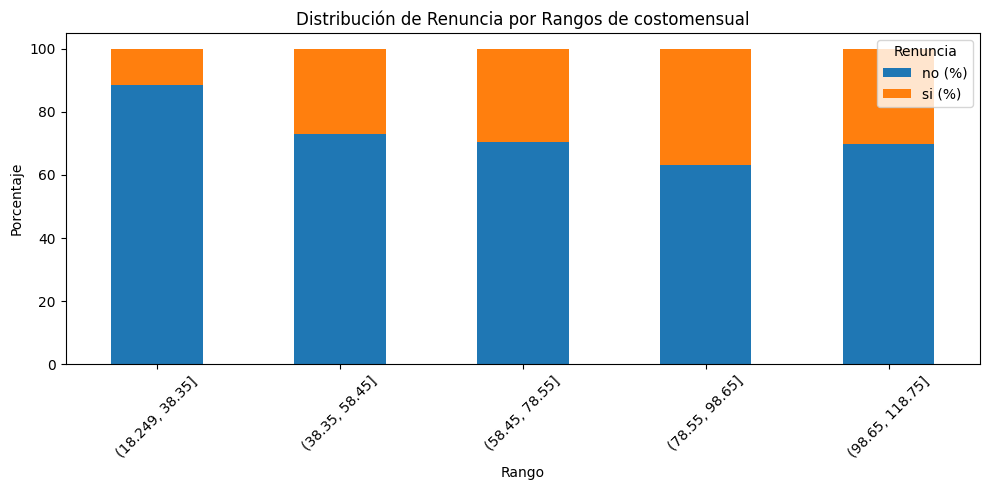

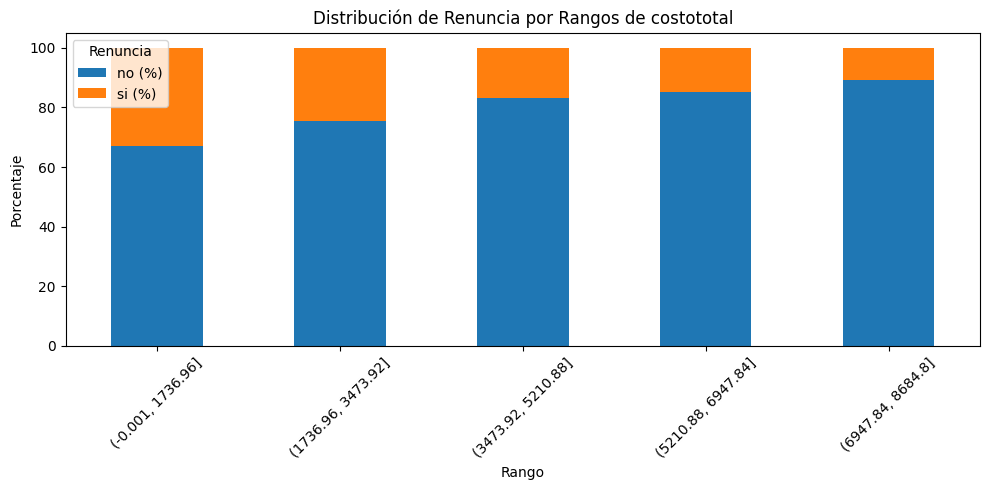

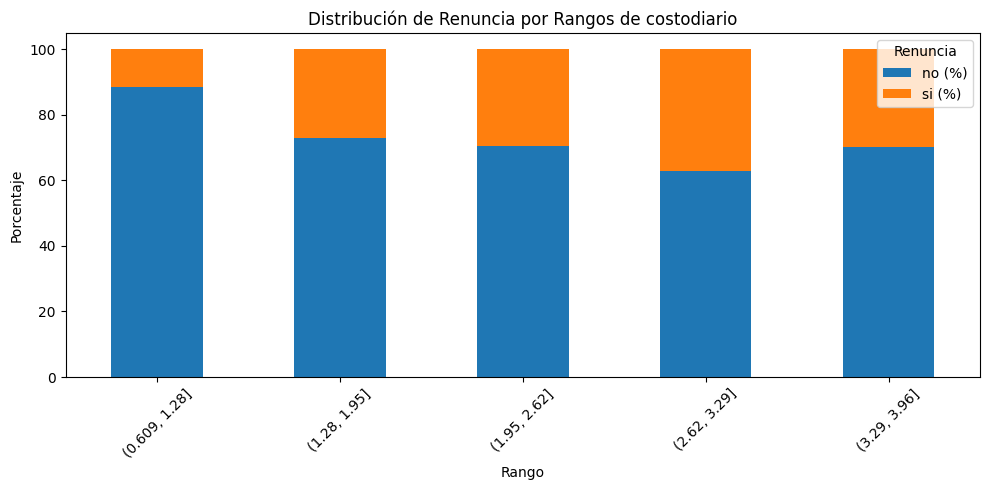

In [47]:
# Crear gráficos apilados por cada variable numérica
for col in tablas_bins:
    tabla = tablas_bins[col]

    # Crear gráfico de barras apiladas
    tabla.plot(x=f'{col}_bin',
               y=['no (%)', 'si (%)'],
               kind='bar',
               stacked=True,
               figsize=(10, 5),
               title=f'Distribución de Renuncia por Rangos de {col}')

    plt.xlabel('Rango')
    plt.ylabel('Porcentaje')
    plt.legend(title='Renuncia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
